In [1]:
using DrWatson
@quickactivate "BNP2"
using Turing
using StatsPlots: StatsPlots
const splot = StatsPlots.plot
using Revise, BNP2

;

┌ Info: Precompiling BNP2 [11504357-4fe5-5405-981c-8cd43ea31635]
└ @ Base loading.jl:1273


In [2]:
args = (
    dt        = 0.1,
    dt_fine   = 0.05,
    alg       = NUTS(50, 0.65),
    n_samples = 100,
)

;

In [7]:
data =
let m = 1.0, obj0 = Particle(m, [0.0, 0.0], [10.0, 20.0]), gravity = [0.0, -m * BNP2.g], T = 20
    env = WithForce(Space(obj0), 1 => gravity)
    traj = simulate(env, PymunkSimulator(args.dt), 2T)
    HTML(animof([env, traj...]; do_tracklocal=false).to_html5_video()) |> display
    (traj = traj[1:T], obj0 = obj0)
end

;

HTML{String}("<video width=\"500\" height=\"500\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAeim1kYXQAAAKhBgX//53cRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv\ncHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w\ndGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o\nZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2\nIGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0\nX3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE2IGxvb2thaGVhZF90aHJlYWRz\nPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j\nb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0\nPTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu\ndD0yNTAga2V5aW50X21pbj0yMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo\nZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9\nNjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAADntliIQAN//+9vD+BTY7mNCX\nEc3onTMfvxW4ujQ3vc4AAAMAAAMADuPlocG+vHIc0AAAWwAGhwHk7ynzPmA6V5EMsXuCe8hBwWGp\nYGIBuKemuqjLsX56sDUcEVYynAr9VOKsBZU/iyZ48ehBvvZ3IdDyVysMELU03Z43T3FOsm1v6XkT\nrA1DYH1uqWgSTeoQLJNyxVUd93GSEbux7nML6cj7BjlwjQFdSrT2/XHjwZRmRkXCHQU7ptLSG3+y\nRm3D/NInS3ZHYZ/2WBrQsPxmz6QOfQNpQXA8hhhQK7ROcHkmV/Pa1/wpwHqqA+QGV0x+/xEimnDT\nfM7CyNtWS0y5OlJeMMmI51bAaTaolmGRtEiY6vZKQqhU6uyyUuto/2XKo7CM2eAu1dotkA83EaRs\nmWgUTCJAmc6xc1br8gz+ZR+KA6wqM2Sa0fdmdNGbvNfZ5Btt+do6QrH1bxY/un7NrPkRE5oBLEfe\n32CzjefeEJuQ7hI/HQzBCYl91Pbs+w8gAAAJtizE9Y/y3r5MFI2AH0PIlgkW8uJcZBJh1Bana7pR\nKnNFdJdWy/f1JmHe6IGkHhutt9YG9V2ev0EKy8To0N7v/qaSbCJUafe5EAG2zPmFjCnBrs3dePEr\neSn97dNQe+0DFuCU1/yeoZ9lT3Dw/SKPhD5A/w2PiVWdQG4SG4VD5+aUFAnXHkU+oD2zMLOIDwMn\n5d88Nd1Dv/oMYkpFRvVLUW+BlOMsj4iXKOLABmrYkdcfKIdfo/TIt5Me3OiInW74+KcbE1prkcZ0\n9Dz6N6CMfhxgPCH9GC/7I0Ss25yCiGhJoNL5aqCGdSyfcJu7DsxJ9nPz9BIQg6IPGDos2K1dZEzs\nf8YslBmMyzgvxDIDkshOwUV+EsdLWxFHhuTfCR4kh+0R56NKfp2ehfNxRzrISAAAFmO7Tcn80OZS\nEe164nz/RJ8EgjOeyk9wojGk0udkxVa/986s80PcDhDX/yv20R6GBg07F33myO+b3cajRXU1Wtk5\n99v6qotwkA8OHrU3AtW5q3ByAUd3tfp6EGOdRYKIn3VUnvi0NT1A7u8z/5VgCvx5Lvj9Se1xzGYR\nQyT+Vp9Z86GkdcTZL/6CmY902t2xIwFCHQfRXByKb3HSP4EHSHG6VG03mK/RSO21SBxEcGuI28Wf\nbj/QOE754X3dzKAf8tVsUTP438LnJXrln/27uKeuD+9/XQDCm0h1LDSlScf+x3olSa/wgpbJohWn\nDzYib5cKDd26Q26GkmdY8x4FFxenOdhqgK/W+i4PqwovK1RnmQ7XfL8DtQAAAwAAjg8daUZtSmq8\nULmYdaGyHc0M2SDonimsmoEvsFZgycxSeoxo8cCFEyKCoWvsqXbs0YAHJ2UHcZjYxsx6x921xmEQ\n/GIm6aXwAGszrcQvb+UZ2EMt3I8ixj7zqStCx64SB9+v2wvvb+q1DacQVE/+IyxTGyoXxdweaNCJ\nnshEbEBuH+QEeaC59wbS+303fxP1bFX7wSuAv0d+fmJ+Bhbi8qeWv/IuxbcOhbW/u9YaNxR5lkXH\nHi/s5AmVd395x8OXccG6xSZAW/ZCGzL+7Z5x4HyAiNT7HzF1jC9DZrPpoxziWgU/p+f/zbBe+Q4V\n1y9T3XOybLOE2BRXgxYhuVrTP0WYYNyXgVpiq2DY/UVP97CsgcQm66FoX+njUuIMekBzQfGqv5TZ\nLB7YTjEYnyg5eg/LWL6NW8XA34Nwmp6nxHDneYDiWnGcHKf6H1h3Fauv87l+6dKYGf//S3/uQvQR\nRbg7yIECUIRUptxMc6G6UvLggigIcxknFkwhE7ENmjyHcZxzuuuenoFZ3HJyfY3OijtkOFZgCBG3\nn3gvpZmkrSAskE22kBrlj9+nhLvdPgPyoTWe4AgSqdg7fq1kGDkXp2Xd3oPk+rXMQvbPJl1wLlNd\nr8Xg5IY0FIva05l0ipk+0ehsra26LJEPuqrVGfOSSXD5cfcE7eLLOgUWaCixVmrlERupOS8KEOg+\nika3W+Mu+sdbT9YdoWw39Yjd1HoUxFKlqhmiTP/pdJn/zcGrznSfYAPXC9uPt8tF0LFpPxty8AkY\nJnlrHTbtFCulW/1ST0CFPPcTARrRt5FSg1ghQnN7CQnphTJPfHc8CmcQuKNIRdFjY1bLILVU0mOF\nlK4OsEoq2c+rAAPErNZv4JZo+OyIs18CCPJWN47EcI5RmVPFOWgsZGfX1UFLvYfds9mdTu5kyjiN\nUE8HtNQsVrpqHbXfnbyL+cKrfI8c6uM2yb7usI6FINPRHsW9kPeK/TsBluwvrDUmZo8BHFh5CzoM\nrB7bIes1q2kwOVVHl3kq31GgJ4xlcNNMa930msf0mef6cv9ViXQpbcKuKe3WQ3Qck5TS3n+uyucu\neV3swNGKd/2RnyqSdlxCHzY++5I0Ae+U+/4TNlUm3937kH3KOikkUMvOajbnWmIhO1mxRMdfMzj6\nTURHQRj6twBosQOfeukaXK/x92gDCXyRUb333ot51E3sQKS1r/lqxxpJgM/nFPclfNbLtlQtcLvi\niawu+2OXCoUKyjj32tfWdd5k1mpnWKyqI4oVm82R7P1lbGLKEXFOaAAmBgBzlso9xB6KReXUunH8\nFcaI9aHqwf524mwAAbloEcROID9bI4H+8GgjLWAtiDtvBa25jQCn40xYUScVcwqrGxhwnFlzlprk\nktaEbP6kQ/cKDv+ZYGsDiRO/p1SxJbLG98lWekBB4aSOmSIA2J+rdu6fB5dC3Epz0NS0lRab6b1A\nTKCPFk18utFLxuvtn2OH1O9flv47YeTfZNa1kHwvX6AzMv

## Single force

┌ Info: Found initial step size
│   ϵ = 0.025
└ @ Turing.Inference /Users/kai/.julia/packages/Turing/MoqTc/src/inference/hmc.jl:553


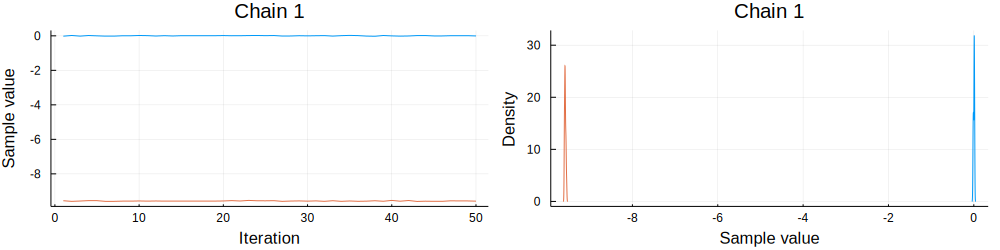

 26.451023 seconds (53.46 M allocations: 2.950 GiB, 4.56% gc time)


In [8]:
@model single_force(obj0, states, dt) = begin
    obj = obj0
    f ~ MvNormal(zeros(2), 10)
    for t in 1:length(states)
        env = WithForce(Space(obj), 1 => f)
        obj = first(objectsof(transition(env, dt)))
        states[t] ~ MvNormal(vec(stateof(obj)), 0.1)
    end
end

@time chn = sample(single_force(data.obj0, vec.(stateof.(data.traj)), args.dt), args.alg, args.n_samples)

splot(chn; colordim=:parameter) |> display

;

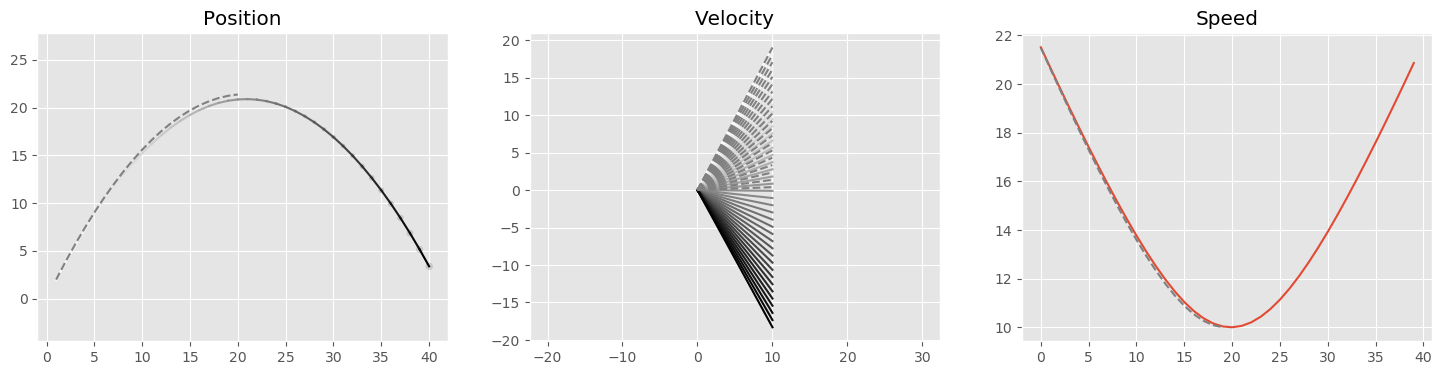

In [9]:
function meantraj(traj_list)
    pos = mean(t.pos for t in traj_list)
    vel = mean(t.vel for t in traj_list)
    return Particle.(1.0, pos, vel)
end

function stdtrajdev(traj_list)
    pos = mean(t.pos for t in traj_list)
    dev = []
    for t in 1:length(pos)
        ps = [traj_list[i].pos[t] for i in 1:length(traj_list)]
        push!(dev, 2 * sqrt(sum(std(ps).^2)))
    end
    return dev
end

function updatedev!(ax, traj_list)
    traj = meantraj(traj_list)
    dev = stdtrajdev(traj_list)
    for t in 1:length(traj)
        c = plt.Circle(tuple(positionof(traj[t])...), dev[t], color="gray", alpha=0.25)
        ax.add_artist(c)
    end
end

let n_mc = 20, res = get(chn[end-n_mc+1:end], [:f]), T = length(data.traj)
    traj_list = []
    for i in 1:n_mc
        f = [res.f[1][i], res.f[2][i]]
        traj = simulate(WithForce(Space(data.obj0), 1 => f), args.dt, 2T)
        push!(traj_list, (pos=positionof.(traj), vel=velocityof.(traj)))
    end
    fig, axes = plot(meantraj(traj_list), data.traj)
    updatedev!(first(axes), traj_list)
    display(fig)
end

;

## Single force and particle parameters

┌ Info: Found initial step size
│   ϵ = 0.0125
└ @ Turing.Inference /Users/kai/.julia/packages/Turing/MoqTc/src/inference/hmc.jl:553


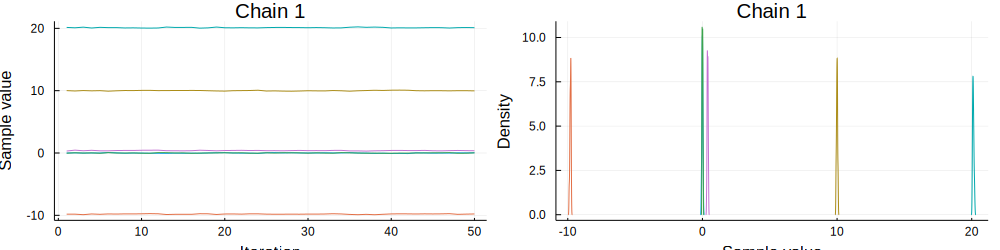

  7.954362 seconds (18.56 M allocations: 1.209 GiB, 4.74% gc time)


In [10]:
@model single_force_all_params(mass, states, dt) = begin
    f ~ MvNormal(zeros(2), 10)
    pos0 ~ MvNormal(zeros(2), 10)
    vel0 ~ MvNormal(zeros(2), 10)
    obj = Particle(mass, pos0, vel0)
    for t in 1:length(states)
        env = WithForce(Space(obj), 1 => f)
        obj = first(objectsof(transition(env, dt)))
        states[t] ~ MvNormal(vec(stateof(obj)), 0.1)
    end
end

@time chn = sample(single_force_all_params(massof(data.obj0), vec.(stateof.(data.traj)), args.dt), args.alg, args.n_samples)

splot(chn; colordim=:parameter) |> display

;

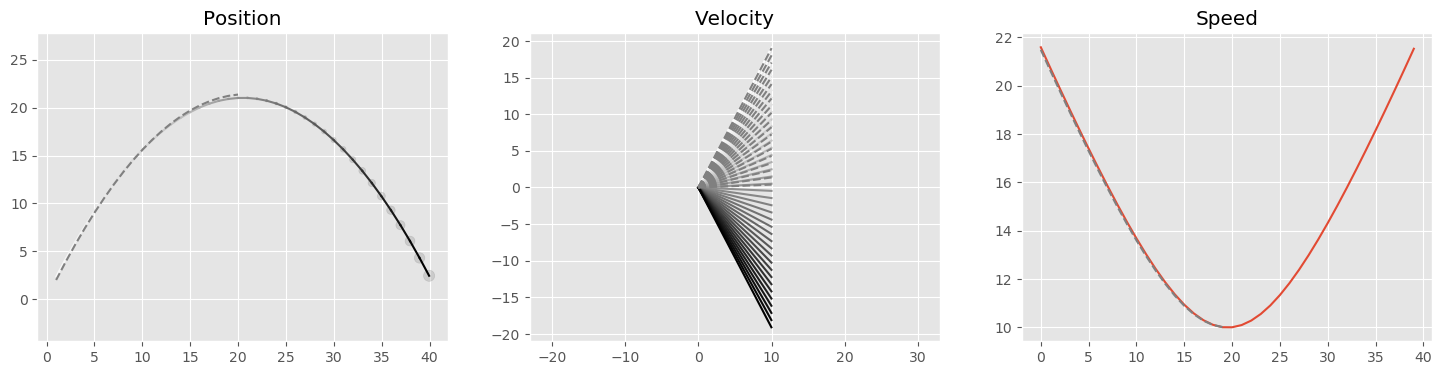

In [11]:
let n_mc = 20, res = get(chn[end-n_mc+1:end], [:f, :mass, :pos0, :vel0]), T = length(data.traj)
    mass = massof(data.obj0)
    traj_list = []
    for i in 1:n_mc
        f = [res.f[1][i], res.f[2][i]]
        pos0 = [res.pos0[1][i], res.pos0[2][i]]
        vel0 = [res.vel0[1][i], res.vel0[2][i]]
        env = WithForce(Space(Particle(mass, pos0, vel0)), 1 => f)
        traj = simulate(env, args.dt, 2T)
        push!(traj_list, (pos=positionof.(traj), vel=velocityof.(traj)))
    end
    fig, axes = plot(meantraj(traj_list), data.traj)
    updatedev!(first(axes), traj_list)
    display(fig)
end

;

In [12]:
data =
let obj0 = Particle(1.0, [0.0, 2.5], [2.5, 0.0]), T = 40,
    bars = [Bar([-20.0, 0.0], [20.0, 0.0]), Bar([5.0, -20.0], [5.0, 20.0])]
    env = WithStatic(WithForce(Space(obj0), 1 => [0.0, -massof(obj0) * BNP2.g]), bars)
    traj = simulate(env, PymunkSimulator(args.dt_fine), 2T)
    HTML(animof([env, traj...]; do_tracklocal=false).to_html5_video()) |> display
    (traj = traj[1:T], obj0 = obj0)
end

;

HTML{String}("<video width=\"500\" height=\"500\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAuym1kYXQAAAKhBgX//53cRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv\ncHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w\ndGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o\nZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2\nIGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0\nX3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE2IGxvb2thaGVhZF90aHJlYWRz\nPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j\nb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0\nPTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu\ndD0yNTAga2V5aW50X21pbj0yMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo\nZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9\nNjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAADRFliIQAN//+9vD+BTY7mNCX\nEc3onTMfvxW4ujQ3vc4AAAMAAAMADuPlocG+vHIc0AAAWwAGhwHgjI/zAtkbje3Nv7naq2En/WfO\nwVUK4fFmLgL7nUgxG0J3fBJwZ+1e/dtfdPfiOCVQhRMMyNzo2XvySZygqxIS+dmRxU5zEQZc/y0C\n5caodl9aCEzQZHv29wMrhDG14SUOv1sNto+hsrccTNYtGFbK0zU0120DmbEgE7cNIio7HfY+Lq4Z\n371TDdnHH1RNoB8xgto3qg66PH++beiIbnpmZFY5BsO+8TKDOhbEeYMBo/Wuq+kajHZgR4ZgCjTv\nLjtjCKsget7Ipos4/HLTgrQO0TEANI789kbTV6WM5jf/KXhuFG3cm+GySLjeET7pQf4P1DoknFZP\nh2xumSm7Id0yM/ZVe4+WYTmc1NVIhDvFUvV9+dglfqwBSWGFsrpOo1sNp3uVtowUMd+1AwR2xugi\nUU0Nw58nv2sK4AABC/i/tUcPVBSoNMGqL2VyK9lSNPoX0Y8LbrFf/L7LhV8O2KcmXLSL8wVdE/pu\nbIjhAgSiD5nD+62PfzP51BHfDmVH9HU+uKkz8Wg1UROvfYpwBhKp73wNWXdlhqjWXVeaMiLLSVoh\n+tRiufM4Mb+11vG8Zss5UrQHdhIAZXifNiI4tDrY1woHL1Dtyn9YOKyF+CtvEm9SBcvRNjd5XNmX\nCk/M179o9Kn18jNdNkZx4i64xvWbuvVweIwTloIf/dB5DyAgBW07+lILd+ZQ2c+iOv+gBd9oN9Sf\nqAc2+PKnxpBbwiNspfge/0KggF4apuJ44L7idEmNUNiS3cUIhjmitHLoHiI+au/aB0ofwvEOXX0w\nh1XTch/s6T92Xf3U0qMSz8tn+xHa8kEBFzpr6EVrutXrSXttkjMfoWto7SudbsfGlbSFjJnauwX2\nqwSEMg3ue4g1U0rC1cAAAFjXVuz2KK8h0xsDg9CIsonAXhEprBtd+LfZJjuWXDfGkFalmxxY1rLl\n7telNRkjD6o5EOnGfZGJ5paiUWxBoEDfIdGeVvCcdzp4sK9XopRK2I+VVs7j5GXMWCtWx/h14jog\ncwUtb+j9jVuubq5EkAiEMBRXPp+Xqq36cLu64Wsy+mx0E8dbv+JvKLRJqjG8IWC/5Nlst1teeG+Y\nuQZwftCBlW5o4pamG2cxYQ8IJZHMXCVzafdLWUmN8n+eZ3fL/rp+a0fbXByvMF/1trDD/SrWZycE\nX1nI1V5dk+Qi0DgjBeGjufqiv7E5TiB+oH1FX2K/Z3tFPnEmIajjSjRNaKfxRQ10KNjgAH9xCXPk\nK4gwmqTMyTGVf0b6OaX2OR7nh8E+UBl1ColFFprS3SbJqS0fytnncMEAB9WcmG4W6OghwOYAm02X\nNITaL8389ZrFfmfJJNQB6VK0vtCA/n12f8CoJInkq86LeUXcF9En0mSFqeAAAAMAeGH57jAMhd7H\n9XItXaS8nvDQSoYX1jJnSwDouTDs/ehAGr7esjCrP7WPIsBg4ZtSdhvZer9U3zgijCC88G2MyWAD\neXSVGBeBmmVdo/ws63NH7LVdA+8pC9FA2ac2pfakfys+3RCQ6TyA+krmyto70ytOAUmc49YE626z\nuv7S4ud9NcujifoyH/9VEy5p48viUkAD8m5qesnjkvq9wJM7phScmdMAyzk6lKHF+ToJwBydwYPY\nh6VuceYR7AkTRlgkJ9GfOIj7P8zfiiexLu7EBPvCbxhuk+5Qve9iFwlNInTwv3i4Io+KToGFXF9Y\naw8MObo14vXqnqK/V+rJIeyRSyJGXx9yi/4S2kgBVgAAAwG+GNid4RabaLRkNts3EGrZgnySHusu\nlXNuJnswgBxRzN7N3ikoyp49hlyprDmbC0RQ/8asYGUNyIZ/6xbAzXdqB2LVrxU41Fphmyv4Xo19\nSBFQ68w5m/RdBPt2mqzMSVgAHY8Vx2IcEqBwpNA9By5WiqF8uxOIzLAqwGlCZtTSg4GTzAc3YmrI\nbFdD74IvOybbyGPMj38PsIHgkPWaNfPufKdYU06x0pWIADdae70uizfTDXW96zEqn5RdRpDU8NGx\nf8t/hKIaUELvnFD49GaBcAAPJCumE9Uu89Q2r+FmidVoP1fBbV9LVyP8KIrIhH01Y0YIPJ0H+Cgz\nq22rpPzaM0KB7PIbOmmSvaNAiQsR/X1Ffe5xYfDKFSqQe011ALMSAyQHJY/B1yzM6IiG9cKGETrd\nwnKvE7hX37MVKwMQ6wJUp59363BhrXCexf/6dM8avXq2p+U3nJ+Vpma4tD+tSHVC7WxOJ+5I8H3Y\n1vxMdWkkK/igQj1KHkNnMHpf5Nm1rTSATRvVZZplH3DheXJBpNXunqKDJsUjFKsituyPa4FQPvmJ\nAOXNu3ShHH84nIEjx+mcF86TADplt/bP/CHjnALZWL0V/tjWtStjAoeaMdhnSLVm9GUYh998BN/5\nCoMgvAABaetEA4RBTgAWZULSvHYa6ABOwrvTrHAjh2ceGyCIyQu4e7z7PFw9acasUwIyima2bF2V\nAADX8Wok5rOflGtiX7lQ8GTFVpdBJK4Jnc5sOOMXgOVPnYrC7tQzlDbh8vQcHDumzCgb18CwmHaA\nCBnvvz7+iHxLHsqG0bSAC0pPbuJj6id7PL8b/5wqrk+YTjUq/R8/NxsYWP4ZL7qweri0s32ZS9Ok\nGWKQsr3FDfzcllJI4NnYhUKbneHu47HsX6wUUREOJfJv/kqTgyoaGyaZssGsZaOZo4y3XcTjdrR4\nsyMIluh5e3RIriDsujNc+gc7yyNPRtz+hwDvgxNWAAAFoj

## Each force for each time step

In [ ]:
@model multiple_forces(obj0, states, dt, ::Type{R}=Float64) where {R} = begin
    obj = obj0
    gravity = [0.0, -massof(obj) * BNP2.g]
    T = length(states)
    F = Vector{Vector{R}}(undef, T)
    for t in 1:T
        F[t] ~ MvNormal(zeros(2), 10)
        env = WithForce(Space(obj), 1 => F[t] + gravity)
        obj = first(objectsof(transition(env, dt)))
        states[t] ~ MvNormal(vec(stateof(obj)), 0.1)
    end
end

@time chn = sample(multiple_forces(data.obj0, vec.(stateof.(data.traj)), args.dt_fine), args.alg, args.n_samples)

splot(chn; colordim=:parameter) |> display

;

In [ ]:
let n_mc = 20, T = length(data.traj)
    chn_sub = get(chn[end-n_mc+1:end], vec([Symbol("F[$t][$i]") for t in 1:T, i in 1:2]))
    traj_list = []
    for i in 1:n_mc
        obj = data.obj0
        traj = Vector{typeof(obj)}(undef, T)
        for t in 1:T
            Ft = [chn_sub[Symbol("F[$t][1]")][i], chn_sub[Symbol("F[$t][2]")][i]]
            env = WithForce(Space(obj), 1 => Ft + [0.0, -massof(obj) * BNP2.g])
            obj = first(objectsof(transition(env, args.dt_fine)))
            traj[t] = obj
        end
        push!(traj_list, (pos=positionof.(traj), vel=velocityof.(traj)))
    end
    fig, axes = plot(meantraj(traj_list), data.traj)
    updatedev!(first(axes), traj_list)
    display(fig)
end

;